## Модель хищник-жертва

In [1]:
import numpy as np

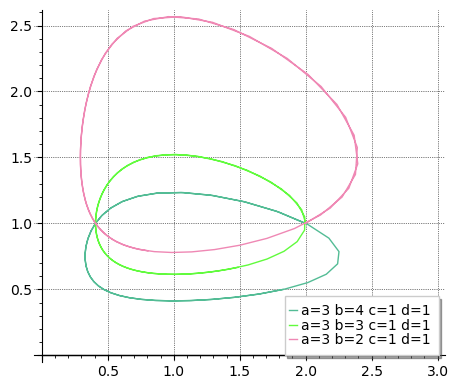

In [2]:
var('y1, y2')
            
t = np.linspace(0, 7, 71)
y0 = [2, 1]
a,b,c,d = 3,3,1,1
pt = plot(0, (x, 0, 3), color='black')
for b in range(4, 1, -1):
    params = [a, b, c, d]
    st = 'a=%d b=%d c=%d d=%d' % tuple(params)
    f = [y1*(a-b*y2), y2*(-c+d*y1)]
    sol = desolve_odeint(f, y0, t, dvars=[y1, y2])
    pt += line(sol, rgbcolor=(randint(0,256)/256, randint(0,256)/256, randint(0,256)/256), legend_label=st)

pt.show(aspect_ratio = 1, gridlines=True)

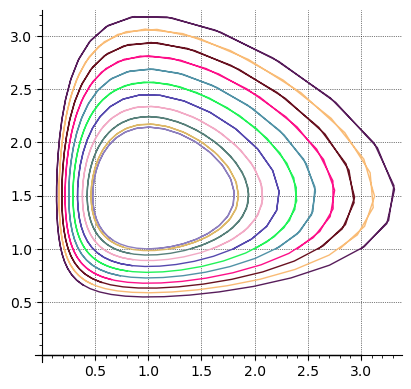

In [3]:
ic = np.linspace(1.0, 3.0, 11) # начальные значения для 1-й функции
pt = plot(0, (x, 0, 3), color='black')
for r in ic:
    y0 = [r, 1.0]
    f = [y1*(a-b*y2), y2*(-c+d*y1)]
    sol = desolve_odeint(f, y0, t, dvars=[y1, y2])
    pt += line(sol, rgbcolor=(randint(0,256)/256, randint(0,256)/256, randint(0,256)/256))

pt.show(aspect_ratio = 1, gridlines=True)

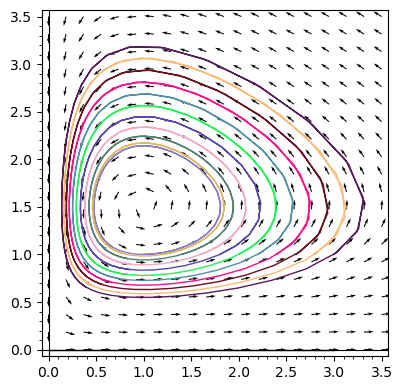

In [4]:
f = [y1*(a-b*y2), y2*(-c+d*y1)]
norm_val = sqrt(f[0]**2 + f[1]**2)
f_norm = (f[0] / norm_val, f[1] / norm_val) 

pt += plot_vector_field(f_norm, (y1, 0, 3.5), (y2, 0, 3.5)) 
pt.show(aspect_ratio=1) 

## Падение тела, брошенного под углом к горизонту

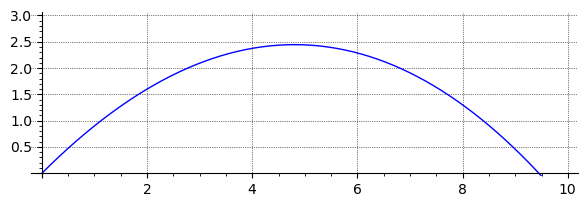

In [5]:
ts = [ ]
ys = [ ]

var('y1 y2 y3 y4')
k = 0.01
g = 9.81
f = [y2, -k*y2*sqrt(y2**2+y4**2), y4, -k*y4*sqrt(y2**2+y4**2)-g]
tmax = 1.41 # время движения, подбирается экспериментально
alph = np.pi/4 # угол бросания тела
v0 = 10.0 # начальная скорость
y0, t0 = [0, v0*np.cos(alph), 0, v0*np.sin(alph)], 0 # начальные условия

t = np.linspace(0, 7, 300)
sol = desolve_odeint(f, y0, t, dvars=[y1, y2, y3, y4])
Y = np.array(sol)
arr = zip(Y[:,0], Y[:,2])
    
line(arr).show(xmin=0, xmax=10, ymin=0, ymax=3, aspect_ratio=1, gridlines=True)

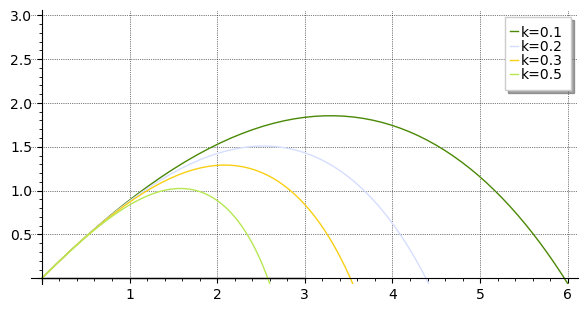

In [6]:
pt = plot(0, (x,0,3), color='black')
K = [0.1, 0.2, 0.3, 0.5]
for k in K:
    f = [y2, -k*y2*sqrt(y2**2+y4**2), y4, -k*y4*sqrt(y2**2+y4**2)-g]
    st = "k={:.1f}".format(k)
    sol = desolve_odeint(f, y0, t, dvars=[y1, y2, y3, y4])
    Y = np.array(sol) 
    arr = zip(Y[:,0], Y[:,2])
    pt += line(arr, rgbcolor=(randint(0,256)/256, randint(0,256)/256, randint(0,256)/256), legend_label=st)

pt.show(xmin=0, xmax=6, ymin=0, ymax=3, aspect_ratio=1, gridlines=True)